# Pandas 3
### Name
### Class
### Date

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

In [3]:
def prob1():
    """
    Use groupby objects to determine information about private
    and public universities.
    Specifically examine the columns 'S.F.Ratio', 'Top10perc',
    and 'Top25perc'.
    For each column return the values of the describe function
    for the type of university with the higher mean.
    
    Return:
        ans_1 (ndarray): describe array of universities with 
                         higher S.F.Ratio
        ans_2 (ndarray): describe array of universities with
                         more students from Top10perc
        ans_3 (ndarray): describe array of universities with
                         more students from Top25perc
    """
    # Read in CSV
    df = pd.read_csv('college.csv')
    grouped = df.groupby('Private')
    
    # Get which column is greater
    gp1 = grouped['S.F.Ratio'].describe()['mean'].idxmax()
    gp2 = grouped['Top10perc'].describe()['mean'].idxmax()
    gp3 = grouped['Top25perc'].describe()['mean'].idxmax()
    
    # Get values
    ans_1 = grouped['S.F.Ratio'].describe().loc[gp1].values
    ans_2 = grouped['Top10perc'].describe().loc[gp2].values
    ans_3 = grouped['Top25perc'].describe().loc[gp3].values

    return ans_1, ans_2, ans_3
prob1()

(array([212.        ,  17.13915094,   3.41804873,   6.7       ,
         15.1       ,  17.25      ,  19.325     ,  28.8       ]),
 array([565.        ,  29.33097345,  17.85139147,   1.        ,
         17.        ,  25.        ,  36.        ,  96.        ]),
 array([565.        ,  56.95752212,  19.58836048,   9.        ,
         42.        ,  55.        ,  70.        , 100.        ]))

# Problem 2

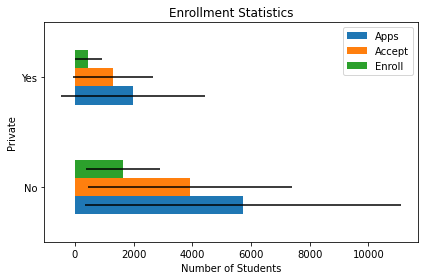

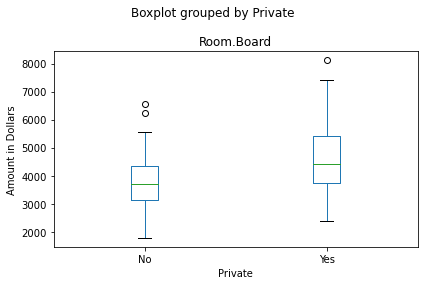

In [4]:
def prob2():
    """
    Use groupby visualizations to compare the following
    in private and public universities:
        1. Number of applicants, accept applicants, and
           enrolled applicants
        2. Range of price for room and board
    """
    df = pd.read_csv('college.csv')
    grouped = df.groupby('Private')
    grouped[["Apps", "Accept", "Enroll"]].mean().plot(kind="barh",
                                                xerr=grouped.std(), 
                                                title="Enrollment Statistics")
    plt.xlabel('Number of Students')
    plt.tight_layout()
    plt.show()
    
    df.boxplot(["Room.Board"], by="Private", grid=False)
    plt.ylabel('Amount in Dollars')
    plt.tight_layout()
    plt.show()

prob2()

# Problem 3

In [63]:
def prob3():
    """
    Use Ohio_1999.csv and pivot tables to answer the
    following questions
        1. Which race/sex combination makes the most money in total?
        2. Which race/sex combination worked the least amount of 
            cumulative hours?
        3. What race/sex combination worked the most hours per week per person?
    
    Returns:
        ans_1 (tuple): tuple with race and sex code, respectively
        ans_2 (tuple): tuple with race and sex code, respectively
        ans_3 (tuple): tuple with race and sex code, respectively
    """
    df = pd.read_csv('Ohio_1999.csv')
    # Highest Usual Weekly Earnings in total?
    vals = df.pivot_table(values='Usual Weekly Earnings', index="Race", 
                          columns="Sex", aggfunc="sum")
    index = np.unravel_index(np.argmax(vals.values.flatten()), vals.shape)
    ans_1 = (index[0] + 1, index[1] + 1)
    
    # Lowest cumulative Usual Hours Worked?
    uhw_piv = df.pivot_table(values='Usual Hours Worked', index="Race", 
                         columns="Sex", aggfunc="sum")
    index = np.unravel_index(np.argmin(uhw_piv.values.flatten()), vals.shape)
    ans_2 = (index[0] + 1, index[1] + 1)
    
    # Highest Average Usual Hours Worked?
    uhw_piv_mean = df.pivot_table(values='Usual Hours Worked', 
                                        index="Race", columns="Sex", 
                                        aggfunc="mean")
    index = np.unravel_index(np.argmax(uhw_piv_mean.values.flatten()), 
                                       vals.shape)
    ans_3 = (index[0] + 1, index[1] + 1)
    
    return ans_1, ans_2, ans_3
prob3()

((1, 1), (3, 2), (3, 1))

# Problem 4

In [103]:
def prob4():
    """
    Use Ohio_1999.csv to answer the following questions:
        1. What is the most common degree among workers?
        2. Which age group works the most hours on average?
        3. What age/degree combination has the smallest yearly
           salary on average?
    
    Return:
        ans_1 (Interval): degree interval
        ans_2 (Interval): age interval
        ans_3 (Interval, Interval): age interval and degree interval
    """
    df = pd.read_csv('Ohio_1999.csv')
    print(df.columns)
    educs = pd.cut(df['Educational Attainment'], [31, 38, 42, 46])
    ans_1 = df.pivot_table(values='Educational Attainment',
                           index=educs, aggfunc="count").idxmax()
    
    ages = pd.qcut(df['Age'], 6)
    ans_2 = df.pivot_table(values='Usual Hours Worked',
                           index=ages).idxmax()
    
    ans_3 = df.pivot_table(values='Yearly Salary',
                           index=[ages, educs]).idxmin()
    return ans_1, ans_2, ans_3
prob4()


Index(['Usual Weekly Earnings', 'Usual Hours Worked', 'Age',
       'Educational Attainment', 'Race', 'Sex', 'Yearly Salary'],
      dtype='object')


(Educational Attainment    (38, 42]
 dtype: interval,
 Usual Hours Worked    (40.0, 46.0]
 dtype: interval,
 Yearly Salary    ((15.999, 29.0], (31, 38])
 dtype: object)

# Problem 5

In [127]:
def prob5():
    """
    Use pivot tables and groupby objects on the data in
    College.csv to answer the following questions:
        1. Is there a correlation between the percent of alumni
           that donate and the amount the school spends per
           student in both private and public universities?
        2. Is the graduation rate partition with the greatest
           number of schools the same for private and public
           universities?
        3. Is there an inverse correlation between acceptance
           rate and having students from the top 10% of their
           high school class?
        4. Why is the average percentage of students admitted
           from the top 10 percent of their high school class
           so high in private universities with very low
           acceptance rates? Use only the data to explain why; 
           do not extrapolate.
    
    Returns:
        ans_1 (bool): answer to question 1
        ans_2 (bool): answer to question 2
        ans_3 (bool): answer to question 3
        ans_4 (str): answer to question 4
    """
    df = pd.read_csv('College.csv')
    #print(df.columns)
    grouped = df.groupby('Private')
    grads = pd.qcut(df['Grad.Rate'], 5)
    for name, group in grouped:
        print(name, group[['Expend', 'perc.alumni']].corr())
    ans1 = True
    
    grads = pd.qcut(df['Grad.Rate'], 5)
    print(df.pivot_table(values='Accept', columns='Private',index=grads, aggfunc='count'))
    ans2 = False
    
    ans3 = False
    
    ans4 = "Not sure"
    
    return ans1, ans2, ans3, ans4
    
prob5()

No                Expend  perc.alumni
Expend       1.000000     0.123694
perc.alumni  0.123694     1.000000
Yes                Expend  perc.alumni
Expend       1.000000     0.378988
perc.alumni  0.378988     1.000000
Private        No  Yes
Grad.Rate             
(9.999, 51.0]  83   78
(51.0, 61.0]   56   98
(61.0, 70.0]   40  122
(70.0, 81.0]   23  129
(81.0, 118.0]  10  138


(True, False, False, 'Not sure')